In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
real_estate_data = pd.read_csv("paris-housing.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

print("First rows of the dataset:")
display(real_estate_data.head())
print("\nDataset information:")
real_estate_data.info()

print("\nDescriptive statistics of the dataset:")
display(real_estate_data.describe())

First rows of the dataset:


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  p

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


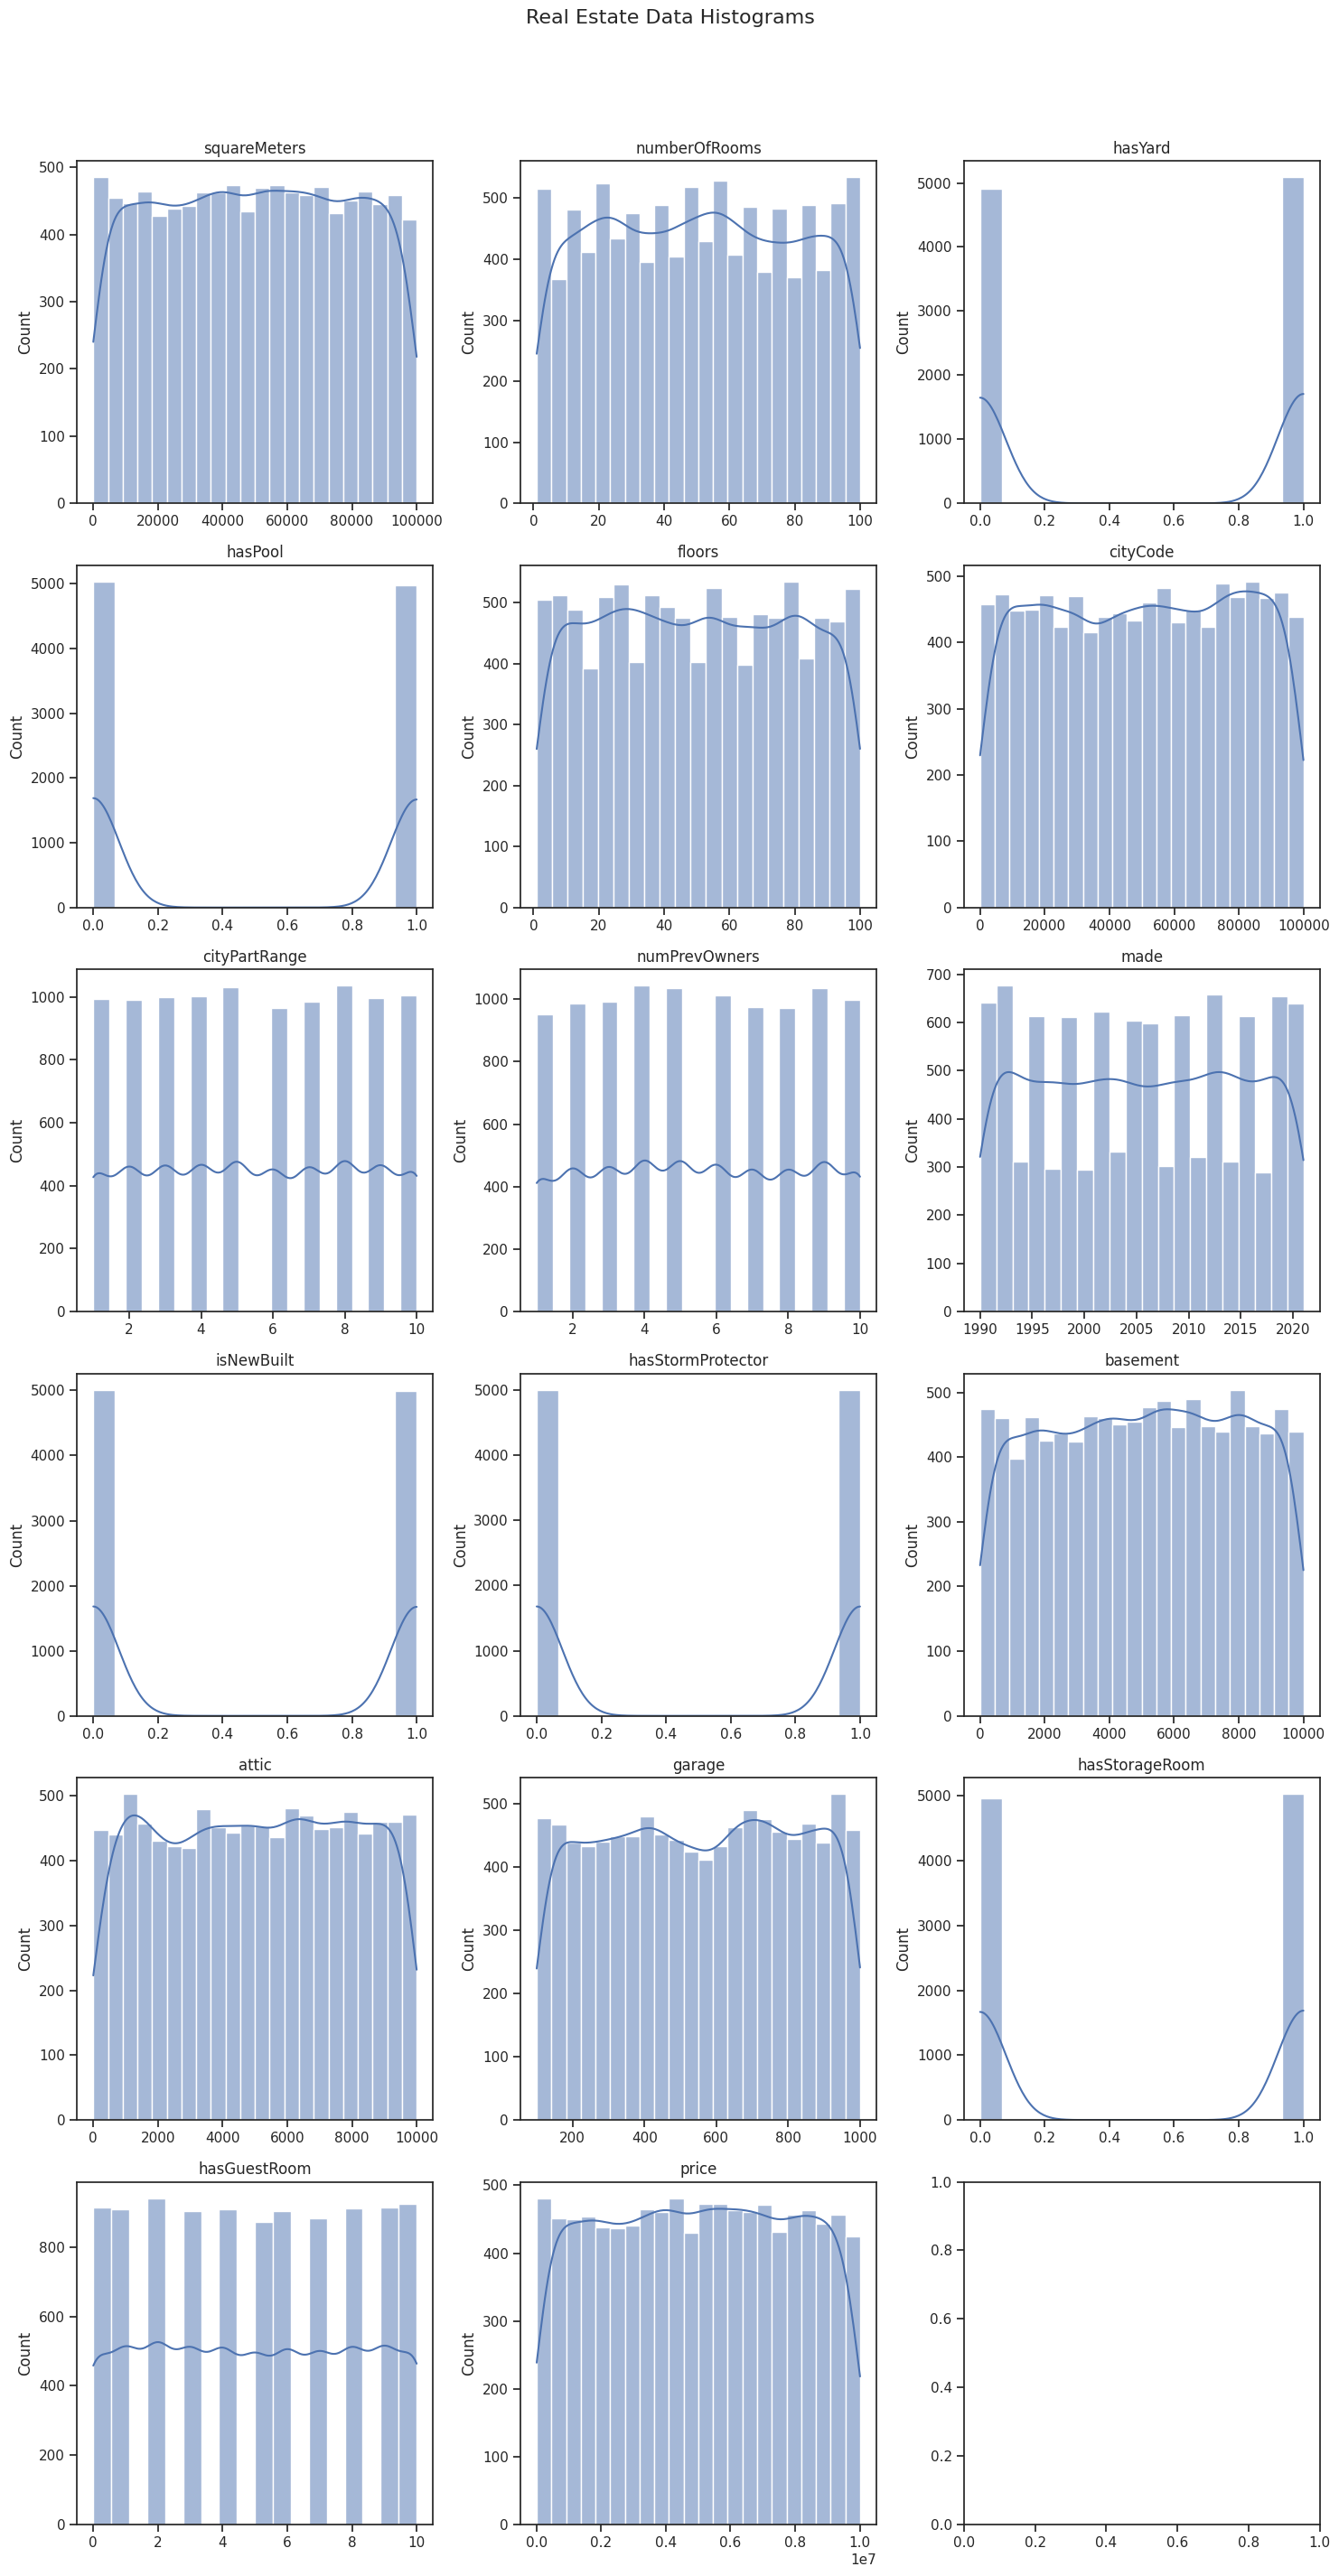

In [5]:
def plot_histograms(data, columns, n_cols=3):
    n_rows = (len(columns) - 1) // n_cols + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle('Real Estate Data Histograms', fontsize=16)

    for i, col in enumerate(columns):
        ax = axes[i//n_cols, i%n_cols] if n_rows > 1 else axes[i%n_cols]
        sns.histplot(data[col], kde=True, ax=ax)
        ax.set_title(col)
        ax.set_xlabel('')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

numeric_columns = real_estate_data.select_dtypes(include=['int64', 'float64']).columns
plot_histograms(real_estate_data, numeric_columns)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

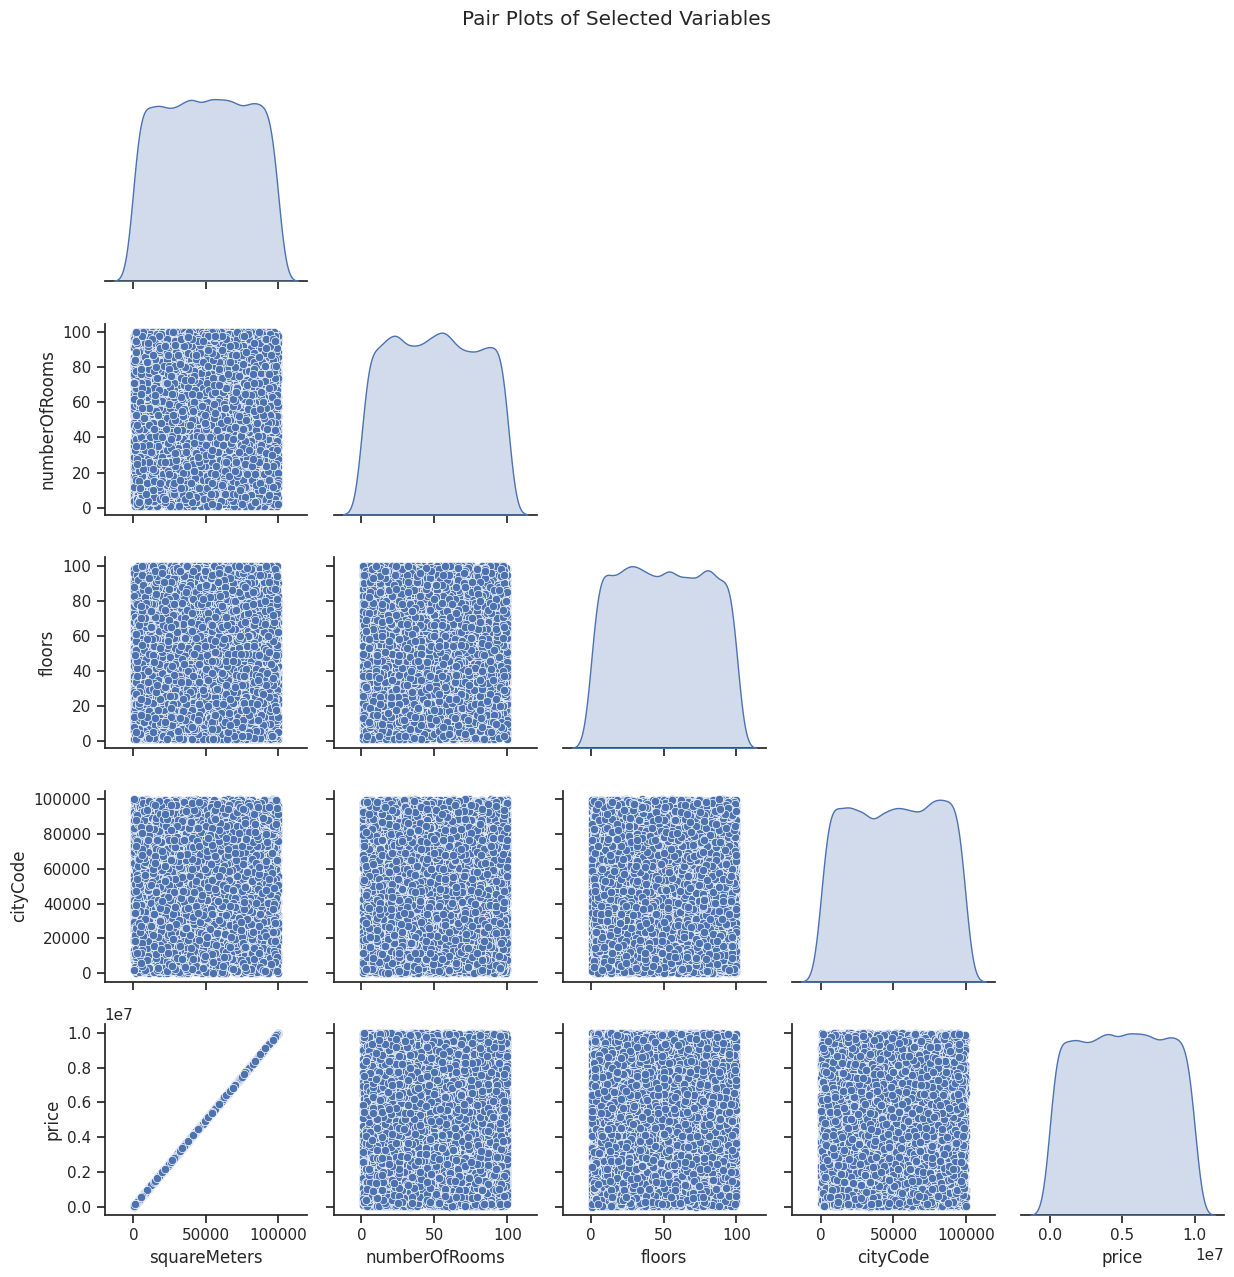

In [6]:
def pair_plots(data, vars, hue=None):
    sns.set(style="ticks")
    sns.pairplot(data[vars], hue=hue, palette="viridis", corner=True, diag_kind="kde")
    plt.suptitle("Pair Plots of Selected Variables", y=1.02)
    plt.tight_layout()
    plt.show()

pair_vars = ['squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'price']
pair_plots(real_estate_data, pair_vars)

<ipython-input-7-5562844e40ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette="Set3")


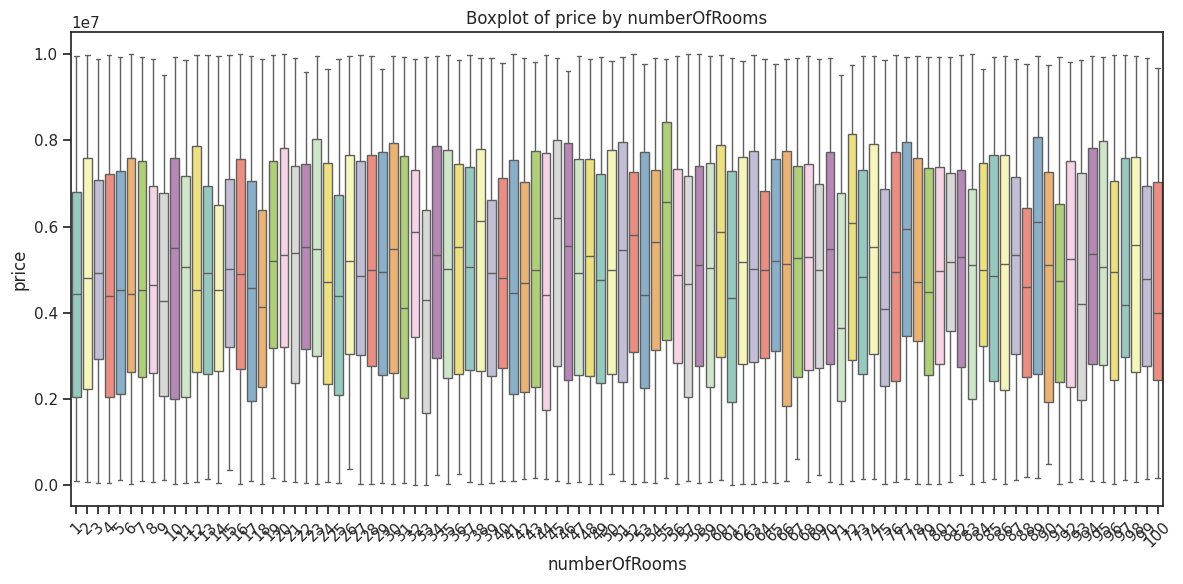

<ipython-input-7-5562844e40ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette="Set3")


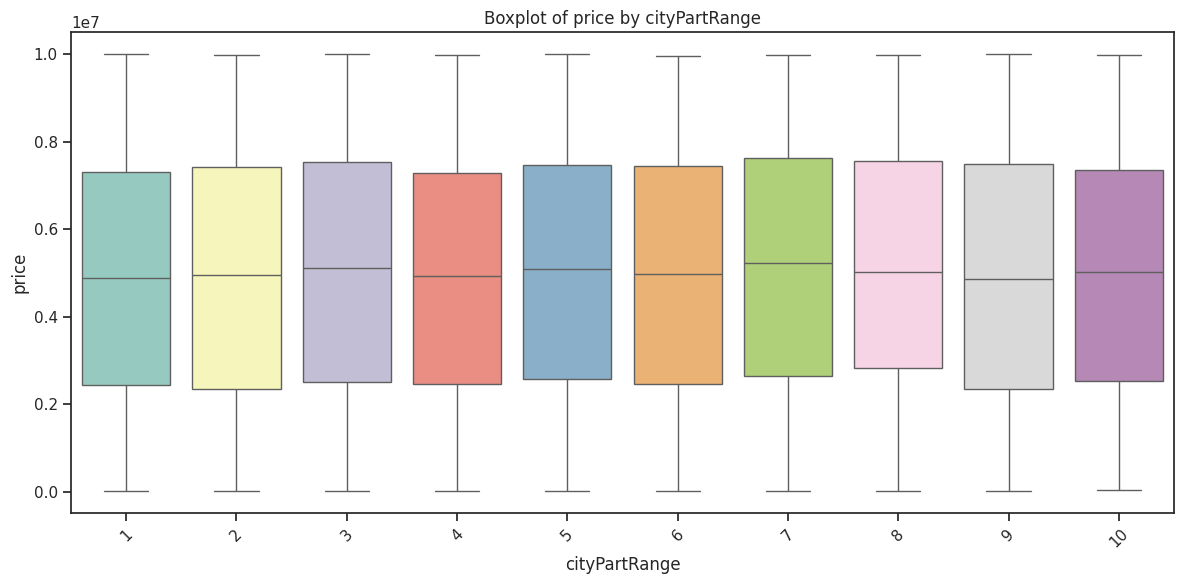

In [7]:
def create_boxplots(data, x, y):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=x, y=y, data=data, palette="Set3")
    plt.title(f'Boxplot of {y} by {x}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

create_boxplots(real_estate_data, 'numberOfRooms', 'price')
create_boxplots(real_estate_data, 'cityPartRange', 'price')

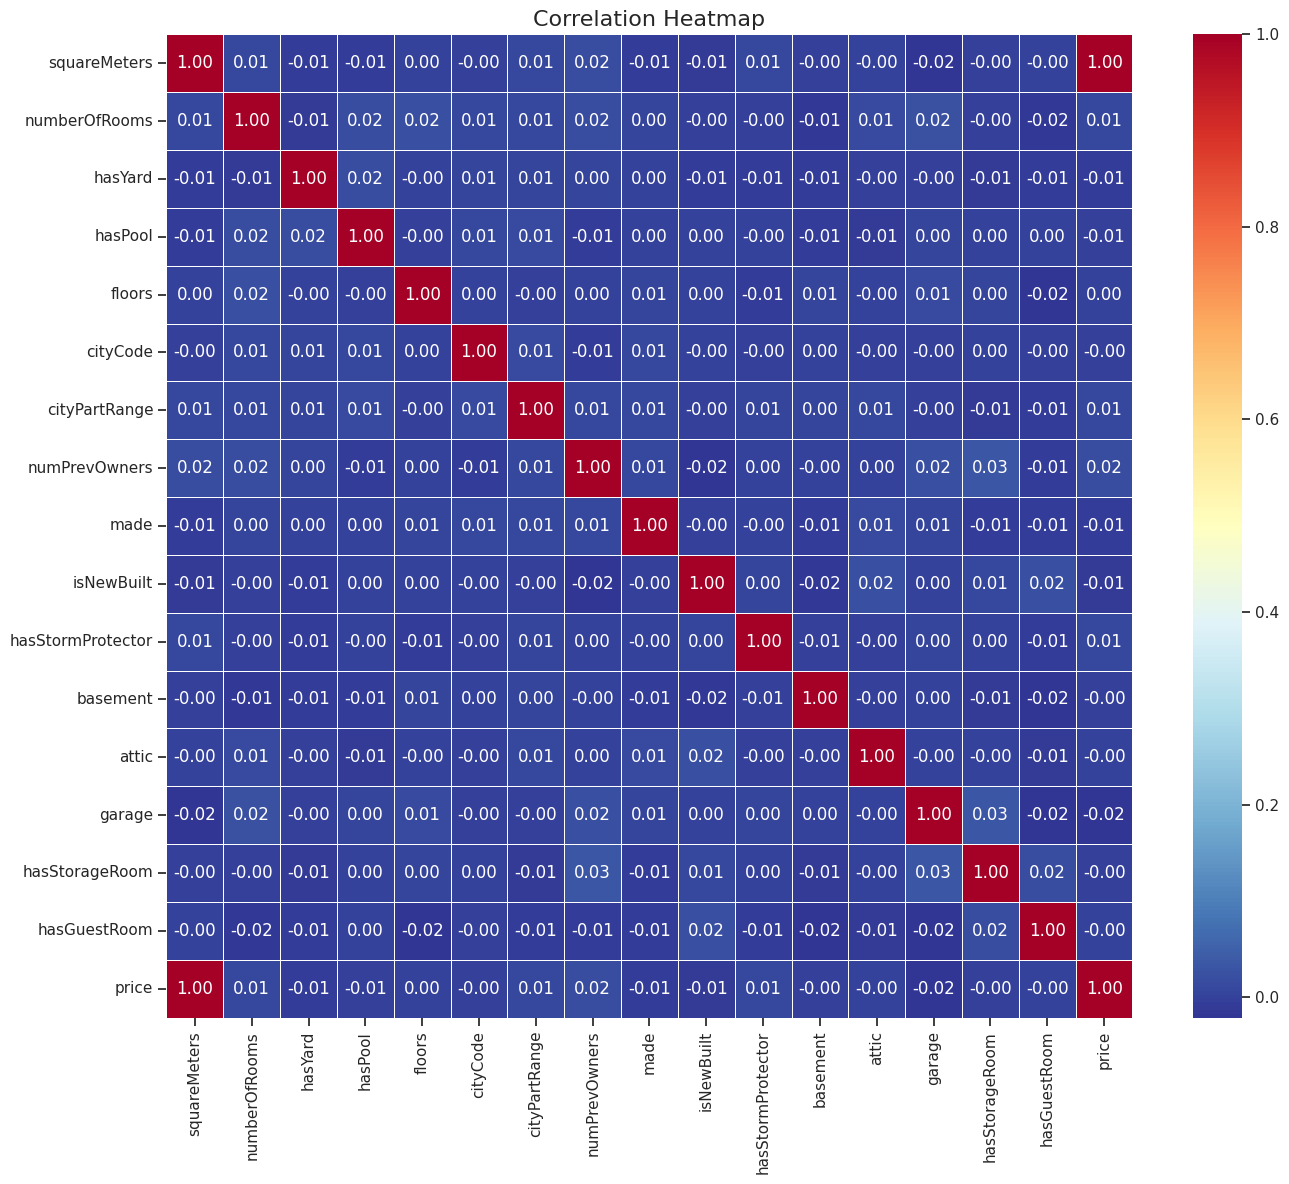

In [8]:
plt.figure(figsize=(14, 12))
sns.heatmap(real_estate_data.corr(), annot=True, cmap='RdYlBu_r', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
features = ['squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'hasYard', 'hasPool',
            'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector',
            'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom']
target = 'price'

X = real_estate_data[features]
y = real_estate_data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 16069625.19
R-squared: 1.00


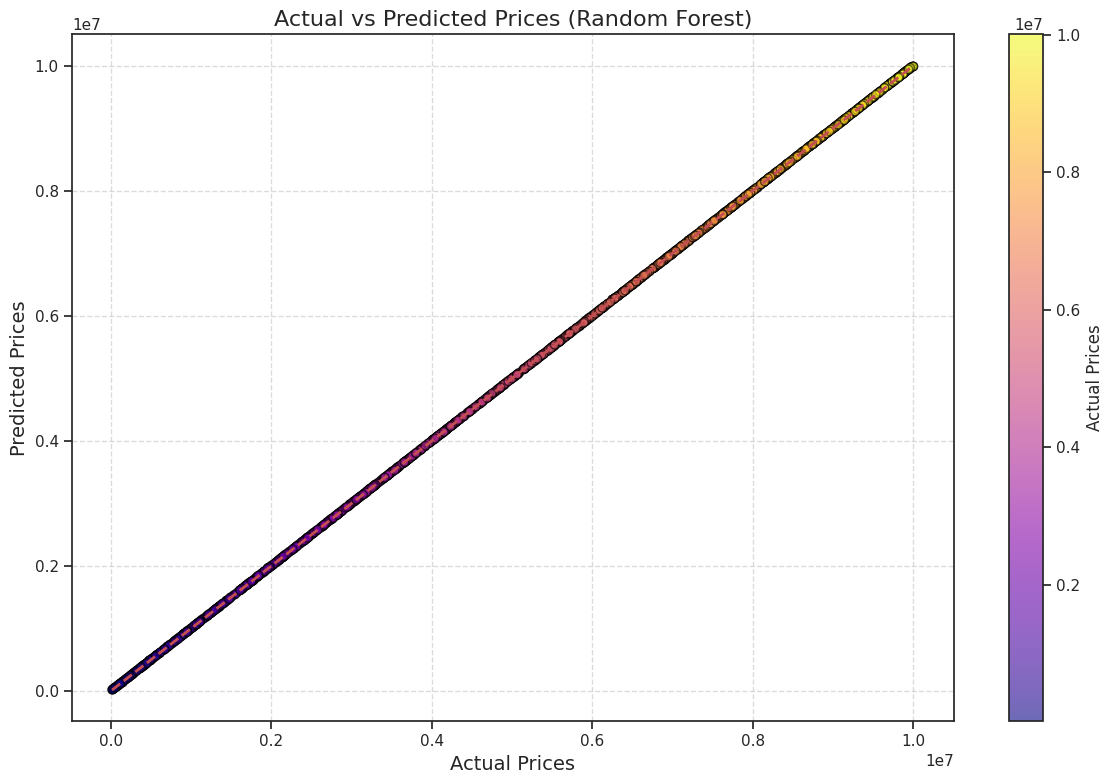

In [10]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(y_test, y_pred, alpha=0.6, c=y_test, cmap='plasma', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices (Random Forest)', fontsize=16)
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
cbar = plt.colorbar(scatter)
cbar.set_label('Actual Prices', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

<ipython-input-12-366a440f343f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance, palette='coolwarm')


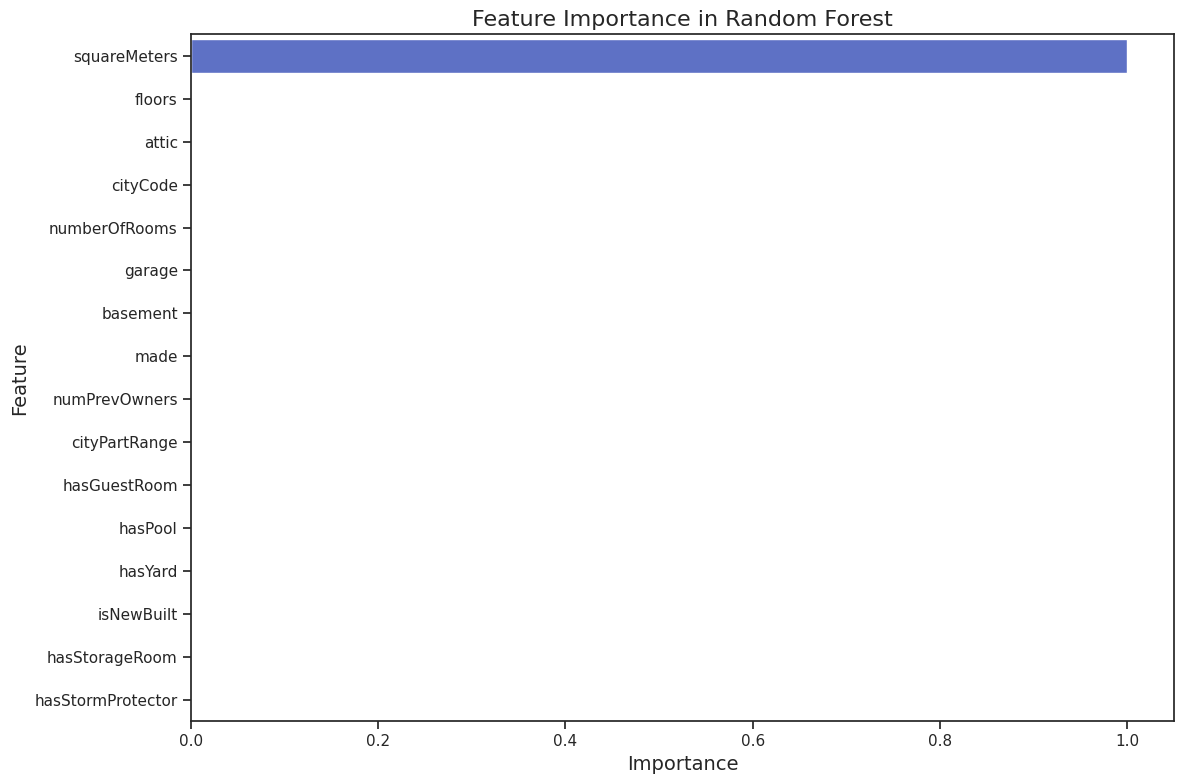

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='coolwarm')
plt.title('Feature Importance in Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

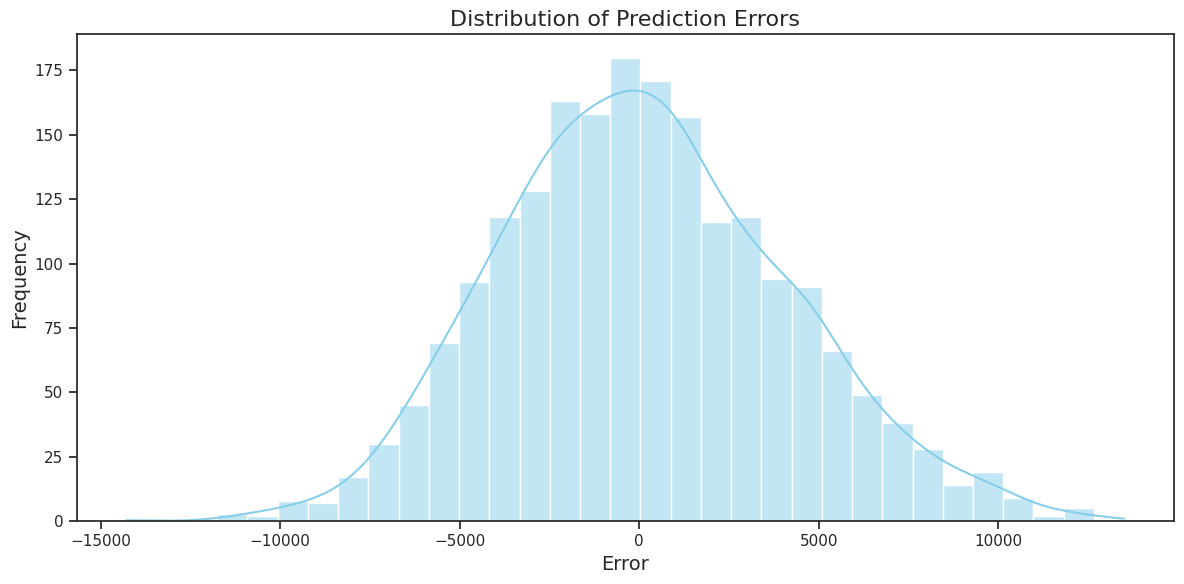

In [13]:
errors = y_test - y_pred
plt.figure(figsize=(12, 6))
sns.histplot(errors, kde=True, color='skyblue')
plt.title('Distribution of Prediction Errors', fontsize=16)
plt.xlabel('Error', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()